In [ ]:
from google.colab import files
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
from matplotlib import cm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = (16,8) # 10, 5

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# # data at:
# https://drive.google.com/file/d/15s9pqm_HZFwkG-dsNPkm1Rvnq40XSqqX/view?usp=sharing
# filename = 'EigenFaces.zip'
# id = '15s9pqm_HZFwkG-dsNPkm1Rvnq40XSqqX'
# drive.CreateFile({'id': id}).GetContentFile(filename)
# !unzip 'EigenFaces.zip'

In [ ]:
image_files = ['EigenFaces/' + f for f in os.listdir('EigenFaces')]
len(image_files)

20

In [ ]:
images_matrix = np.asarray([np.asarray(Image.open(im, 'r').convert('L')).flatten() for im in image_files], 'f')
images_matrix.shape # already transposed N x K^2 matrix   M = K^2 x N, M^T = N x K^2

(20, 62500)

In [ ]:
mean_between_images = images_matrix.mean(axis=0)
mean_between_images.shape

(62500,)

In [ ]:
mean_images_matrix = images_matrix - mean_between_images
mean_images_matrix.shape

(20, 62500)

In [ ]:
mtm = mean_images_matrix.dot(mean_images_matrix.T) # M^T * M
mtm.shape

(20, 20)

In [ ]:
eigen_values, eigen_vectors_u = np.linalg.eigh(mtm)
print(eigen_values.shape, eigen_vectors_u.shape)
eigen_values

(20,) (20, 20)


array([-1.28525238e+02,  4.90866880e+07,  5.84108720e+07,  7.23214720e+07,
        7.61623200e+07,  8.14185040e+07,  8.82104080e+07,  9.42748640e+07,
        1.20775392e+08,  1.28598056e+08,  1.64420288e+08,  1.75877728e+08,
        1.91235632e+08,  2.11943600e+08,  2.32228928e+08,  2.71310560e+08,
        3.59388416e+08,  4.68694080e+08,  7.08298112e+08,  1.34135066e+09],
      dtype=float32)

In [ ]:
# Eigen values are already sorted. If that is so, then eigen vectors must be sorted too.
# All we have to do is reverse the order.
eigen_values = eigen_values[::-1]  # reversed
eigen_vectors_u = eigen_vectors_u[::-1]  # reversed
eigen_values_sum = eigen_values.sum()

In [ ]:
best_vectors = np.asarray([eigen_vectors_u[i] for i in range(len(eigen_vectors_u)) if eigen_values[:i+1].sum()<0.9*eigen_values.sum()])
best_vectors.shape

(12, 20)

In [ ]:
best_images_matrix = mean_images_matrix.T.dot(best_vectors.T)  # M * u[:12] -> 62500x20 * 20x12
best_images_matrix.shape

(62500, 12)

In [ ]:
def plot_images(data, nrows=3, ncols=4, figsize=(16,8), shape=(250,250)):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()
    fig.subplots_adjust(wspace=0)

    for i in range(nrows*ncols):
        ax[i].imshow(data[i].reshape(shape), cmap="gray")

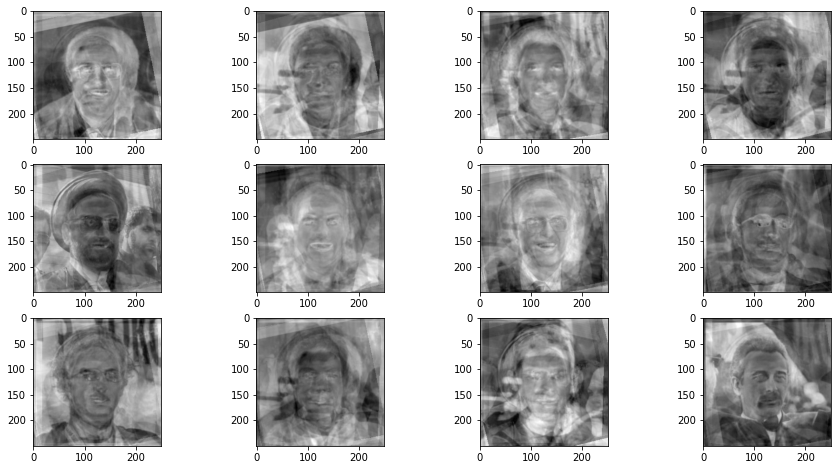

In [ ]:
plot_images(data = best_images_matrix.T)

In [ ]:
eigenfaces = np.asarray([best_images_matrix.T[i].reshape(250,250) for i in range(len(best_vectors))])
eigenfaces.shape

(12, 250, 250)

In [ ]:
im_to_vec_cast = np.asarray([[e.flatten().dot((i_m - mean_between_images)) for e in eigenfaces] for i_m in images_matrix])
im_to_vec_cast.shape

(20, 12)

In [ ]:
to_sum = np.asarray([[im_to_vec_cast[i][j]*eigenfaces[j] for j in range(12)] for i in range(20)])
to_sum.shape

(20, 12, 250, 250)

In [ ]:
summed = to_sum.sum(axis=1)
summed.shape

(20, 250, 250)

In [ ]:
final_images = summed + mean_between_images.reshape(250,250)
final_images.shape

(20, 250, 250)

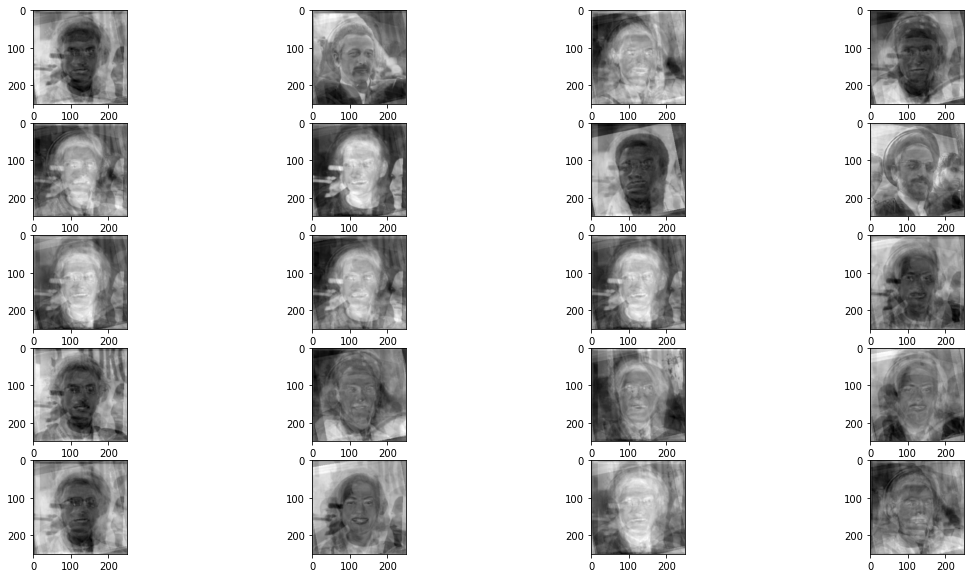

In [ ]:
plot_images(final_images, nrows=5, ncols=4, figsize=(20,10), shape=(250,250))

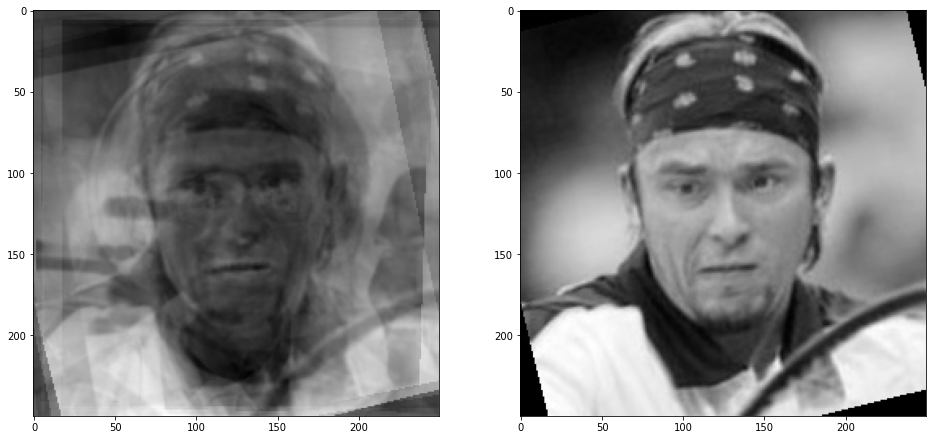

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(final_images[3], cmap='gray')
ax[1].imshow(images_matrix[3].reshape(250,250), cmap='gray')